In [222]:
import calendar
import datetime
import time
from dateutil.relativedelta import relativedelta
from datetime import timedelta
import pandas as pd
import numpy as np
import requests
import re
import json
from urllib.parse import unquote 
from bs4 import BeautifulSoup as bs


In [223]:
def get_etf():
    etf_csv=pd.read_csv('Developed Asia Pacific ETF List (108).csv')
    symbol=etf_csv['Symbol']
    inception=etf_csv['Inception']
    count=0
    real_symbol=[]
    in_s=[]
    for candiate in inception:
        s=datetime.datetime.strptime(candiate, "%d/%m/%Y")
        if s<=datetime.datetime.strptime("31/12/2015", "%d/%m/%Y"):
           # print(s.strftime("%d/%m/%Y"))
            in_s.append(s.strftime("%d/%m/%Y"))
            real_symbol.append(symbol[count])
        count=count+1
    return real_symbol

In [224]:
def get_url(etf):
    url=[]  
    url.append("https://www.moneydj.com/ETF/X/xdjbcd/Basic0003BCD.xdjbcd?etfid="+etf+"&b=2015-12-31&c=2018-12-31")
    return url

In [258]:
def get_SID(etf):
    url = 'http://mschart.morningstar.com/chartweb/defaultChart'
    data ={"type":"gettid",
               "symbol":"ARCX%3A"+etf+"%2C",
               "region":"usa",
               "ifmt":"0",
               "callback":
               "jQuery16404257182418483476_1552564606341",
               "fbclid":"IwAR3nDY3tKOiMUpfM5D3v_60juu-jN6QXy7uKwlt6faLPHTRUp7p4Tv6_iTo",
              }
    data['symbol'] = unquote(data['symbol'])
    response_data  = requests.get(url,params = data)
    while str(response_data) != "<Response [200]>":
        time.sleep(30)
        response_data  = requests.get(url,params = data)
    response = re.search('("SID":.*)',response_data.text).group(1)
    response = response.strip(",")
    jsonObj = json.loads("{" + response + "}")
    return jsonObj['SID']
    

In [255]:
def get_SpecialSID(etf, type):
    url = 'http://mschart.morningstar.com/chartweb/defaultChart'
    data ={"type":"gettid",
               "symbol":type+"%3A"+etf+"%2C",
               "region":"usa",
               "ifmt":"0",
               "callback":
               "jQuery164015945599281440592_1552582871510",
               "_":"1552582871596",
              }
    data['symbol'] = unquote(data['symbol'])
    response_data  = requests.get(url,params = data)
    while str(response_data) != "<Response [200]>":
        time.sleep(30)
        response_data  = requests.get(url,params = data)
    response = re.search('("SID":.*)',response_data.text).group(1)
    response = response.strip(",")
    jsonObj = json.loads("{" + response + "}")
    return jsonObj['SID']

In [227]:
start_date="2015-12-31"
end_date="2018-12-31"
start = datetime.datetime.strptime(start_date, "%Y-%m-%d") # datetime.strptime(date_string, format) return datetime
stop = datetime.datetime.strptime(end_date, "%Y-%m-%d")

In [228]:
def get_date(url):
    res = requests.get(url) 
    doc = bs(res.text, 'lxml')
    data = doc.select_one('p').get_text()
    datas=data.split(' ',1)
    date=datas[0]
    date=date.split(',')
    days=[] #csv裡面的date
    for day in date:
        day=datetime.datetime.strptime(day, "%Y%m%d")
#         days.append(day)
        days.append(day.strftime("%Y-%m-%d"))
    end_day=[] #月底
#     for i in range(len(days)-1):
#         beforeday=days[i]
#         nextday=days[i+1]
#         if (beforeday.year and beforeday.month)!=(nextday.year and nextday.month):
#             end_day.append(beforeday.strftime("%Y/%m/%d"))
#     end_day.append(days[len(days)-1].strftime("%Y/%m/%d"))# last day
    return days

In [229]:
# def get_nav(url):
#     res = requests.get(url) 
#     doc = bs(res.text, 'lxml')
#     data = doc.select_one('p').get_text()
#     datas=data.split(' ',1)
#     date=datas[0]
#     date=date.split(',')
#     days=[] #csv裡面的date
#     for day in date:
#         day=datetime.datetime.strptime(day, "%Y%m%d")
#         days.append(day)
#     end_day=[] #月底
#     for i in range(len(days)-1):
#         beforeday=days[i]
#         nextday=days[i+1]
#         if (beforeday.year and beforeday.month)!=(nextday.year and nextday.month):
#             end_day.append(beforeday.strftime("%Y%m%d"))
#     end_day.append(days[len(days)-1].strftime("%Y%m%d"))# last day
# #     print(end_day[36])
# #     print(len(end_day))
#     value=datas[1].replace(' ',',')
#     value=value.split(',')
#     v1=value[0:755]
#     index=[]
#     nav=[]
#     for i in range(0,37):
# #         print(end_day[i])
#         count=0
#         for   cday in date:
#             if end_day[i]==cday:
#                 index.append(count)
#                 nav.append(float(v1[count]))
#             count=count+1
# #     print(index)
# #     print(nav)
#     return nav
    

In [273]:
def get_nav(sid):
    url = 'http://mschart.morningstar.com/chartweb/defaultChart'
    data ={"type":"getcc",
               "secids":sid+";FE",
               "dataid":"8217",
               "startdate":start_date,
               "enddate":end_date,
               "currency":'',
               "callback":
               "jQuery164037768611303957256_1552562088558",
               "_":"1552562089572",
               "fbclid":"IwAR2I9agGAPHkn4rs7EtvvH5euhkTajwxVMwp5U7X6l-PxxaHWUlZNdtXUqQ"
              }
    response_data  = requests.get(url,params = data)
    while str(response_data) != "<Response [200]>":
        time.sleep(30)
        response_data  = requests.get(url,params = data)
    response = re.search('("d":.*)',response_data.text).group(1)
    jsonObj = json.loads(response[4:len(response) - 8])
    nav = []
    date = []
    for i in range(0,755):
        date.append(jsonObj[i]['i'])
        nav.append(jsonObj[i]['v'])
    return nav
#     doc = bs(res.text, 'lxml')
#     data = doc.select_one('p').get_text()
#     datas=data.split(' ',1)
#     date=datas[0]
#     date=date.split(',')
#     days=[] #csv裡面的date
#     for day in date:
#         day=datetime.datetime.strptime(day, "%Y%m%d")
#         days.append(day)
#     end_day=[] #月底
#     for i in range(len(days)-1):
#         beforeday=days[i]
#         nextday=days[i+1]
#         if (beforeday.year and beforeday.month)!=(nextday.year and nextday.month):
#             end_day.append(beforeday.strftime("%Y%m%d"))
#     end_day.append(days[len(days)-1].strftime("%Y%m%d"))# last day
# #     print(end_day[36])
# #     print(len(end_day))
#     value=datas[1].replace(' ',',')
#     value=value.split(',')
#     v1=value[0:755]
#     index=[]
#     nav=[]
#     for i in range(0,37):
# #         print(end_day[i])
#         count=0
#         for   cday in date:
#             if end_day[i]==cday:
#                 index.append(count)
#                 nav.append(float(v1[count]))
#             count=count+1
# #     print(index)
# #     print(nav)
#     return nav

In [231]:
# end_day,nav=get_nav("https://www.moneydj.com/ETF/X/xdjbcd/Basic0003BCD.xdjbcd?etfid=EWY&b=2015-12-31&c=2018-12-31")

In [274]:
dict={}
etfs=get_etf()
etfsXANSList=[]
etfsBATSList=[]
etfsSpecialList=[]
etfs.remove('FDT')
etfs.remove('ENZL')
etfs.remove('IDLB')
etfs.remove('FJP')
etfs.remove('IVAL')
etfs.remove('DXJS')
etfs.remove('IMOM')
etfs.remove('FPA')
etfs.remove('PAF')
etfs.remove('FDTS')
etfs.remove('DDBI')
etfs.remove('FHK')
etfs.remove('FKO')
etfsSpecialList.append({"Name": 'FDT', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'ENZL', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'IDLB', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'FJP', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'IVAL', "Type": "BATS"})
etfsSpecialList.append({"Name": 'DXJS', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'IMOM', "Type": "BATS"})
etfsSpecialList.append({"Name": 'FPA', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'PAF', "Type": "XASX"})
etfsSpecialList.append({"Name": 'FDTS', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'DDBI', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'FHK', "Type": "XNAS"})
etfsSpecialList.append({"Name": 'FKO', "Type": "XNAS"})
dict['date']=get_date('https://www.moneydj.com/ETF/X/xdjbcd/Basic0003BCD.xdjbcd?etfid=EWY&b=2015-12-31&c=2018-12-31')
for etf in etfs:
    sid=get_SID(etf)
    dict[etf] = get_nav(sid)
#     url=get_url(etf)
#     dict[etf]=get_nav(url[0])
for etf in etfsSpecialList:
    sid=get_SpecialSID(etf['Name'], etf['Type'])
    dict[etf['Name']]=get_nav(sid)
print('done')


done


In [276]:
data=pd.DataFrame(dict)
data

,date,EWJ,EWY,FNDF,VPL,DXJ,EWT,EWH,EPP,FNDC,...,FJP,IVAL,DXJS,IMOM,FPA,PAF,FDTS,DDBI,FHK,FKO
0,2015-12-31,49.12000,50.43000,23.90000,56.68000,50.80162,25.90000,19.90000,38.64000,26.60000,...,47.17734,24.11000,34.60039,25.50000,27.72003,1.07420,33.32379,24.76000,33.68294,22.89217
1,2016-01-04,48.32000,48.62000,23.31000,55.70000,49.54594,25.00000,19.49000,37.84000,26.13000,...,46.46168,23.66000,33.76041,24.90000,27.12008,1.08770,32.83398,24.36000,32.96744,22.28896
2,2016-01-05,48.20000,48.92000,23.24000,55.94000,49.22959,24.84000,19.49000,37.38000,26.01000,...,46.75015,23.61000,33.70988,24.74000,27.18426,1.12390,32.74746,24.31000,33.04432,22.54204
3,2016-01-06,47.84000,48.17000,22.96000,54.99000,48.63128,24.42000,19.30000,36.71000,25.76000,...,46.38360,23.23000,33.41889,24.63000,26.97436,1.11960,32.44690,23.95000,32.81005,22.39104
4,2016-01-07,47.04000,47.48000,22.56000,53.94000,47.40941,23.94000,18.87000,35.74000,25.39000,...,45.18920,22.72000,32.90100,24.49000,26.24077,1.12040,31.83621,23.57000,31.82209,22.02760
5,2016-01-08,46.88000,47.91000,22.35000,53.24000,47.14765,24.02000,18.80000,35.49000,25.23000,...,44.52822,22.62000,32.53623,24.34000,26.06824,1.10960,31.43709,23.25000,31.07373,22.10147
6,2016-01-11,47.00000,46.92000,22.22000,53.26000,47.13365,23.60000,18.35000,34.99000,25.07000,...,45.30190,22.55000,32.52797,24.11000,25.80799,1.11940,31.40465,23.23000,30.71454,21.85269
7,2016-01-12,45.36000,46.85000,22.08000,53.05000,45.71657,23.60000,18.26000,34.84000,24.68000,...,44.26822,22.25000,31.49799,23.78000,25.89683,1.09800,30.99421,23.36000,30.71179,21.94516
8,2016-01-13,46.48000,47.74000,22.30000,52.68000,47.15457,23.78000,18.48000,35.30000,24.99000,...,44.00095,22.75000,32.40859,24.04000,25.68858,1.09360,30.79964,23.07000,30.14699,22.04435
9,2016-01-14,45.44000,46.95000,22.03000,53.12000,45.90986,23.48000,18.33000,34.68000,24.50000,...,44.02697,22.24000,31.66905,23.29000,25.96704,1.10460,30.70922,23.22000,30.51154,22.19764


In [277]:
data.to_csv(r'./nav.csv',index=False,sep=',')

In [278]:
import matplotlib.pyplot as plt

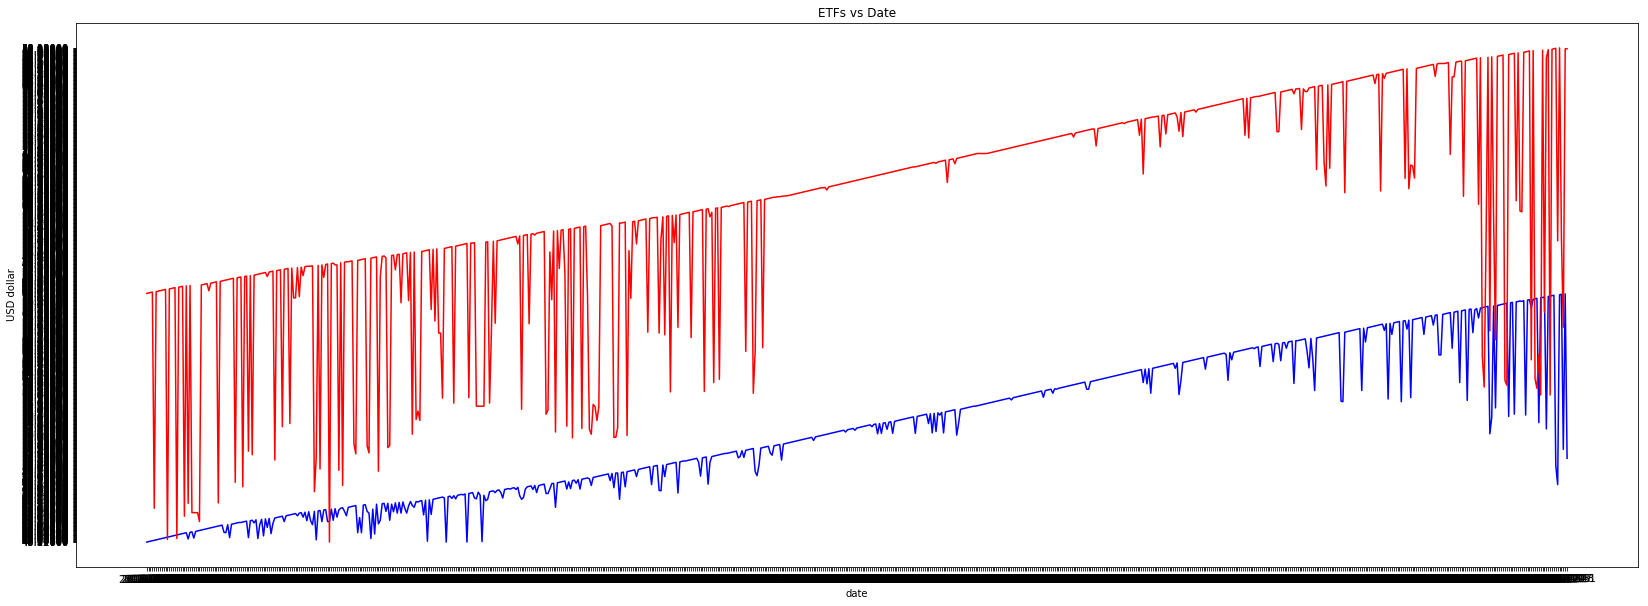

In [279]:
plt.figure(figsize=(28,10))
plt.title('ETFs vs Date')
plt.xlabel('date')
plt.ylabel('USD dollar')
plt.plot(dict['date'], dict['EWJ'],'b',label='EWJ')
plt.plot(dict['date'], dict['EWY'],'r',label='EWY')
plt.xticks(dict['date'], dict['date'], rotation=1)
plt.show()